In [1]:
import yaml
import pandas as pd
import xml.etree.ElementTree as ET
import re
import numpy as np
import json
import time
import requests
import html
import random
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
import os
# TQDM to Show Progress Bars #
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook

# SKLearn libraries for splitting sample and validation
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import scipy
import matplotlib.patches as mpatches
import warnings
import matplotlib.pyplot as plt
from umap import UMAP  # Assuming you have imported UMAP
from sklearn.cluster import KMeans

/Users/christinaziegler/anaconda3/envs/bertopic_env/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
training_data = pd.read_csv("training_data_new3.csv")

# Clustering

In [4]:
abstracts = [t.lower() for t in training_data["text_descr300"].fillna('')]


In [5]:
sent_trans_model = SentenceTransformer('sentence-transformers/allenai-specter')
# pritamdeka/S-Scibert-snli-multinli-stsb

README.md: 0.00B [00:00, ?B/s]

In [6]:
bert_vectors = sent_trans_model.encode(abstracts)

KeyboardInterrupt: 

In [111]:
conditions = [
    (training_data['SofAI'] == 1) & (training_data['AIforS'] == 0), 
    (training_data['SofAI'] == 0) & (training_data['AIforS'] == 1),
    (training_data['SofAI'] == 1) & (training_data['AIforS'] == 1),
]

choices = ['Sustainability of AI', 'AI for Sustainability', 'Both']

training_data['label'] = np.select(conditions, choices, default='None')

palette = sns.color_palette("rocket", 4)

COLOR_KEY = {}

# Assign colors to labels

COLOR_KEY['Sustainability of AI'] = "#112856"
COLOR_KEY['AI for Sustainability'] = "#a1d13d"
COLOR_KEY['Both'] = "#098da3"
COLOR_KEY['None'] = "#C0C0C0"

In [51]:
training_data['label'].value_counts()

label
for     744
both    131
of      118
none      7
Name: count, dtype: int64

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings

def plot_elbow_method(embedding):
    warnings.filterwarnings(action='ignore', category=FutureWarning, module='sklearn')

    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Times New Roman'

    Sum_of_squared_distances = []
    K = range(1, 8)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(embedding)
        Sum_of_squared_distances.append(km.inertia_)

    green_color = '#6bae77'
    
    plt.figure(figsize=(8, 6))  # Adjust the figure size (width, height) as needed

    sns.set_style("whitegrid")
    ax = sns.lineplot(x=K, y=Sum_of_squared_distances, marker='o', color=green_color, linestyle='-')
    plt.xlabel('Number of clusters (k)', fontsize=12, family="Times New Roman")
    plt.ylabel('Sum of squared distances', fontsize=12, family = "Times New Roman")
    plt.title('Elbow Method For Optimal k', fontsize=14, family     = "Times New Roman")
    for item in ax.get_yticklabels():
        item.set_fontname('Times New Roman')
    for item in ax.get_xticklabels():
        item.set_fontname('Times New Roman')
    plt.xticks(fontsize=10)  # Set the font size of x-axis ticks
    plt.yticks(fontsize=10)  # Set the font size of y-axis ticks   # Add a grid for better readability
    plt.tight_layout()  # Adjust layout for better spacing
    plt.grid(True)
    plt.savefig('elbow_method.png')  # Save the plot if needed
    plt.show()


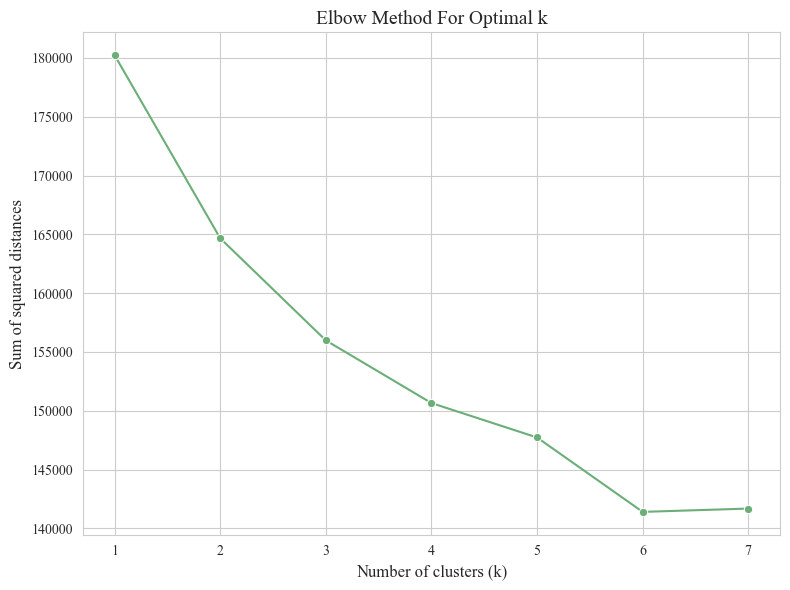

In [113]:
plot_elbow_method(bert_vectors)

In [114]:
K = 2
kmeans = KMeans(n_clusters=K,random_state=0).fit(bert_vectors)
cls_dist=pd.Series(kmeans.labels_).value_counts()

In [115]:
distances = scipy.spatial.distance.cdist(kmeans.cluster_centers_,bert_vectors)
centers={}
print("Cluster", "Size", "Center-idx","Center-Example", sep="\t\t")
for i,d in enumerate(distances):
    ind = np.argsort(d, axis=0)[0]
    centers[i]=ind
    print(i,cls_dist[i], ind, training_data["text_descr300"][ind] ,sep="\t\t")

Cluster		Size		Center-idx		Center-Example
0		493		717		electricity storage device, vehicle, electricity storage device control method, and program a power storage device  includes a power storage unit  including a plurality of cells, and a bmu  configured to control the power storage unit . the bmu  includes an upper limit power acquisition unit  configured to acquire, based on a soc and a temperature of the power storage unit , an upper limit power that is an upper limit of a power output from the power storage unit  or a power input to the power storage unit . a power storage device  includes a power storage unit  including a plurality of cells, and a bmu  configured to control the power storage unit . the bmu  includes an upper limit power acquisition unit  configured to acquire, based on a soc and a temperature of the power storage unit , an upper limit power that is an upper limit of a power output from the power storage unit  or a power input to the power storage unit . technical

Cluster		Size		Center-idx		Center-Example
0		493		717		electricity storage device, vehicle, electricity storage device control method, and program a power storage device  includes a power storage unit  including a plurality of cells, and a bmu  configured to control the power storage unit . the bmu  includes an upper limit power acquisition unit  configured to acquire, based on a soc and a temperature of the power storage unit , an upper limit power that is an upper limit of a power output from the power storage unit  or a power input to the power storage unit . a power storage device  includes a power storage unit  including a plurality of cells, and a bmu  configured to control the power storage unit . the bmu  includes an upper limit power acquisition unit  configured to acquire, based on a soc and a temperature of the power storage unit , an upper limit power that is an upper limit of a power output from the power storage unit  or a power input to the power storage unit . technical

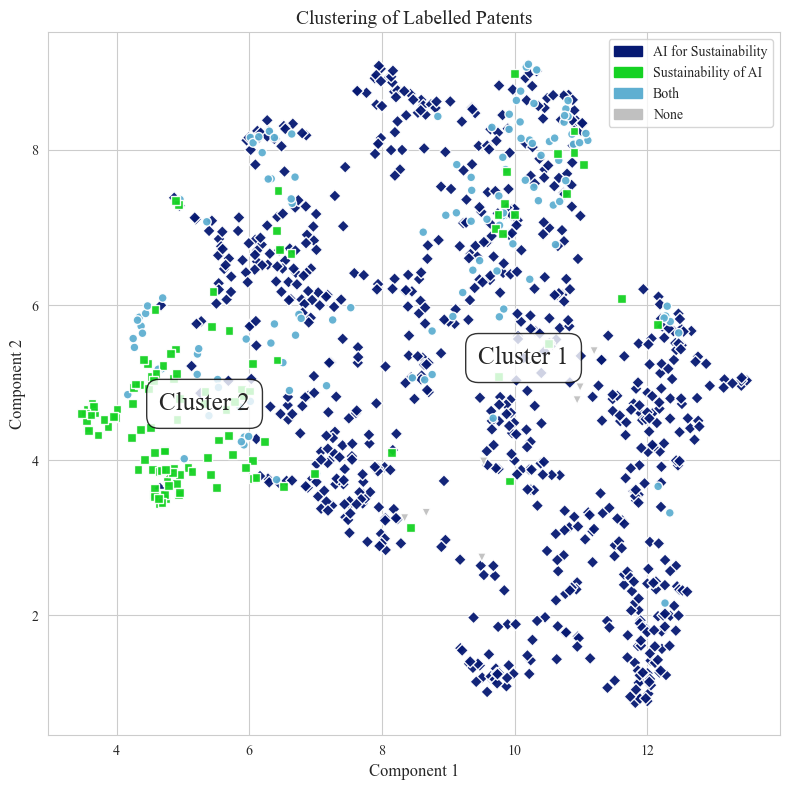

In [116]:
import numpy as np
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Set the global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Assign colors to labels
COLOR_KEY = {
    'AI for Sustainability': "#061972",
    'Sustainability of AI': "#15d223",
    'Both': "#5fafd1",
    'None': "#C0C0C0"
}

# Assign marker styles to labels
MARKER_KEY = {
    'AI for Sustainability': 'D',    # Diamond
    'Sustainability of AI': 's',     # Square
    'Both': 'o',                     # Circle
    'None': 'v'                      # Triangle down
}

kmeans = KMeans(n_clusters=2, random_state=0).fit(bert_vectors)
cls_dist = pd.Series(kmeans.labels_).value_counts()
distances = scipy.spatial.distance.cdist(kmeans.cluster_centers_, bert_vectors)
centers = {}
print("Cluster", "Size", "Center-idx", "Center-Example", sep="\t\t")
for i, d in enumerate(distances):
    ind = np.argsort(d, axis=0)[0]
    centers[i] = ind
    print(i, cls_dist[i], ind, training_data["text_descr300"][ind], sep="\t\t")

# Example data (replace with your actual data)
X = UMAP(n_components=2, min_dist=0.2, n_neighbors=15).fit_transform(bert_vectors)
labels = training_data['label']

# Map labels to colors and marker styles
colors = [COLOR_KEY[label] for label in labels]
markers = [MARKER_KEY[label] for label in labels]

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust figure size as needed

# Scatter plot of data points with different markers
for marker in np.unique(markers):
    ix = np.where(np.array(markers) == marker)
    ax.scatter(X[ix, 0], X[ix, 1], c=np.array(colors)[ix], marker=marker, s=40, alpha=0.95, edgecolors='w', label=marker)

# Annotate cluster centers
for c in centers:
    ax.text(X[centers[c], 0], X[centers[c], 1], f"Cluster {c+1}", fontsize=18, ha='center', va='center',
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5', edgecolor='black'))

# Create legend
legend_elements = [mpatches.Patch(color=color, label=label) for label, color in COLOR_KEY.items()]
ax.legend(handles=legend_elements, loc='best', fontsize=10)

# Add labels and title
ax.set_xlabel('Component 1', fontsize=12)
ax.set_ylabel('Component 2', fontsize=12)
ax.set_title('Clustering of Labelled Patents', fontsize=14)

# Adjust layout
plt.tight_layout()

# Save or display the plot
plt.savefig('umap_visualization.png')  # Save the plot if needed
plt.show()


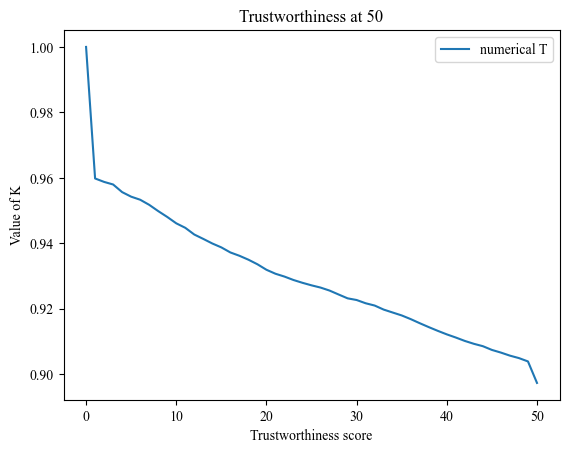

In [25]:
from umap import validation

K = 50

numerical_trustworthiness = validation.trustworthiness_vector(
    source=umap_model._raw_data,  # the original high-dimensional data
    embedding=umap_model.embedding_,  # the UMAP low-dimensional embedding
    max_k=K
)



_=plt.plot(numerical_trustworthiness)
_=plt.ylabel("Value of K")
_= plt.xlabel(f"Trustworthiness score")
_=plt.title(f"Trustworthiness at {K}")
_=plt.legend(["numerical T", "categorical T"], loc="upper right")